In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Gershman2012_replication import Agent

n_trials = 500
alpha_thresh = 0.0001
c = -1
kappa = 0.67  #(0.0 - 0.9)  # recurrent inhibition strength
lambda_param = 1.17  #(0.0-0.9)  # lateral inhibition strength
tau = 0.5  # time constant of accumulator
recall_threshold = 1
noise_std = 0.0003  # (0.0 - 0.8)
learning_rate = .1  # learning rate for SR


In [2]:
# some example input words:
text_body = 'A B C D E F G H I'
word_list = text_body.split()
sequence_length = len(word_list)
# associate each word with a unique state index:
word_index = {}
idx = 0
for word in word_list:
    if word not in word_index:
        word_index[word] = idx
        idx += 1

# generate some word sequence from the body of text (the word sequence the agent will see)
word_sequence = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
# translate to state indices:lag_matrix
state_sequence = [word_index[word] for word in word_sequence]
word_order = [word_index[word] for word in word_list]
number_of_recalls = range(len(word_index))

# initialise agent:
ag = Agent(len(word_list), learning_rate=learning_rate)

L = np.ones((len(word_list), len(word_list))) - np.eye(len(word_list))

all_recalled_words = []
# learn for a given number of trials.
for trial in range(n_trials):
    ag.reset_trace()
    ag.reset_matrix()
    ag.reset_x()
    # learning over M does not accumulate across different trials (each trial is tested with free recall
    # individually)
    for t in range(len(state_sequence) - 1):
        ag.update(state_sequence[t], state_sequence[t + 1])

    ag.SR_Ms[:, :, trial] = ag.M
    # ADD FREE RECALL AFTER EACH TRIAL HERE
    recalled_words = ag.do_free_recall_LBA(number_of_recalls)
    all_recalled_words.append(recalled_words)


/home/jgeerts/Projects/semanticassociation/Gershman2012_replication.py:107: RuntimeWarning: divide by zero encountered in true_divide
  time_to_threshold = (threshold - intercept) / slope


In [3]:
rw = np.array(all_recalled_words)

In [4]:
lag_matrix = np.empty((ag.n,ag.n))
for i in range(ag.n):
    startletter = word_sequence[i]
    for j in range(ag.n):
        endletter = word_sequence[j]
        lag_matrix[i,j] = word_sequence.index(endletter) - word_sequence.index(startletter)
        

In [5]:
lag_matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [-2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.],
       [-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-7., -6., -5., -4., -3., -2., -1.,  0.,  1.],
       [-8., -7., -6., -5., -4., -3., -2., -1.,  0.]])

In [6]:
lag_count = {i:0 for i in list(range(-8,9))}

counter = 0 
for trial in rw:
    for i, startword in enumerate(trial[:-1]):
        nextword = trial[i+1]
        lag = lag_matrix[startword, nextword]
        lag_count[lag] += 1
        counter+=1

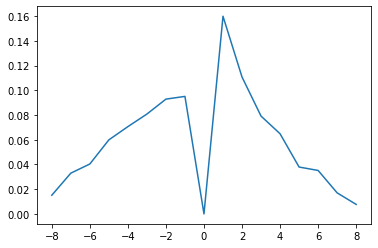

In [7]:
plt.plot([i for i in lag_count.keys()], [i/ counter for i in lag_count.values()])

In [8]:
lag_count

{-8: 55,
 -7: 120,
 -6: 147,
 -5: 218,
 -4: 257,
 -3: 294,
 -2: 338,
 -1: 346,
 0: 0,
 1: 582,
 2: 403,
 3: 288,
 4: 236,
 5: 138,
 6: 128,
 7: 62,
 8: 28}